In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sy
from scipy.io import loadmat

# **Task 1: Neutral vs. Expression**

In [162]:
data = loadmat('/content/drive/MyDrive/msml 603/project_1/data.mat')

face = data['face']

face.shape

(24, 21, 600)

In [163]:
a = np.arange(0,600,1)
a = a.reshape((200,3))

neutral = a[:,0].T
exp = a[:,1].T
illum = a[:,2].T

In [164]:
face_neutral = face[:,:,neutral]
face_exp = face[:,:,exp]
face_illum = face[:,:,illum]

f1,f2,n = face_neutral.shape

print(f1,f2,n)

24 21 200


In [165]:
Y1 = np.zeros([n, f1*f2])
Y2 = np.zeros([n,f1*f2])


for i in range(0,n):
  aux1 = face_neutral[:,:,i]
  Y1[i,:] = aux1.flatten()
  aux2 = face_exp[:,:,i]
  Y2[i,:] = aux2.flatten()



In [290]:
c1 = n
c2 = n
Y = np.vstack((Y1,Y2))
F1 = np.arange(0,c1,1)
F2 = np.arange(c1,c1+c2,1)

Y1.shape

(200, 504)

In [167]:
U,sig,V = np.linalg.svd(Y.T)
nPCA = 20
Y_1 = np.matmul(Y,U[:,0:nPCA])

print(Y_1.shape)

Y_1

(400, 20)


array([[21.5095226 , -2.71467672,  0.16852993, ...,  1.75630304,
        -1.39953643,  0.15071549],
       [21.46777178, -1.0567934 , -0.8434701 , ...,  1.00461035,
         1.92641512,  1.07466651],
       [21.48931531, -1.08319604, -1.70621747, ...,  1.41927214,
        -0.49188885, -0.61430994],
       ...,
       [20.28947868,  1.63715437,  0.81436667, ..., -0.72903262,
        -1.12350549, -1.71769024],
       [20.28005744,  4.28595323,  2.34500237, ..., -0.81539827,
         0.13454836,  0.86783633],
       [20.3635391 ,  3.17860738, -1.75491717, ...,  0.50654114,
        -2.32371119,  1.33771825]])

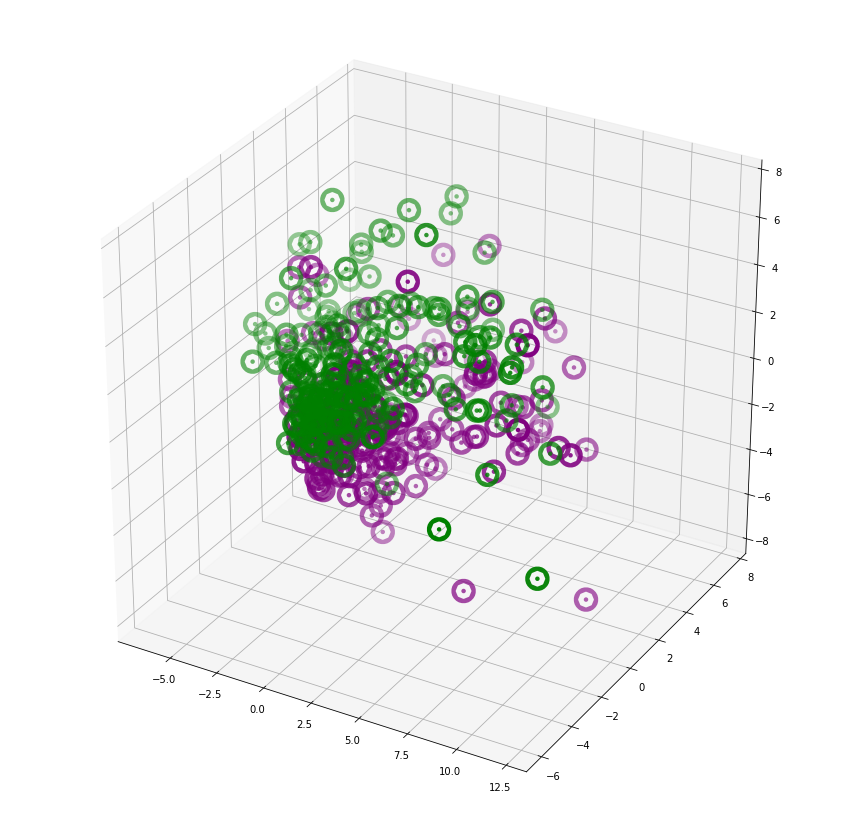

In [168]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.scatter(Y_1[F1,1],Y_1[F1,2],Y_1[F1,3],linewidth=20,color='green')
ax.scatter(Y_1[F2,1],Y_1[F2,2],Y_1[F2,3],linewidth=20,color='purple')

In [300]:
x_train = np.vstack((Y1[0:150,:],Y2[0:150,:])) # using 150 to train
y_train = np.hstack((np.zeros(150),np.ones(150))) # 0 is neutral face and 1 is exp face

x_test = np.vstack((Y1[150:n,:],Y2[150:n,:]))


In [ ]:
def KNN(x_train,y_train,x_test,K):
  N_tr = len(x_train)
  N_ts = len(x_test)
  y_pred = np.zeros(N_ts)
  for i in range(1,N_ts):
    tempdiffs = np.matlib.repmat(x_test[i,:],N_tr) - x_train
    tempdists = np.linalg.norm(tempdiffs)
    tempdists,I = tempdists.sort()
    #y_pred(i) = mode(y_train(I[1:K]))


for i in range(0,len(test_indx)): 
  ytest = Ytest[i,:]
  dist_sq = np.linalg.norm(Ytrain - np.ones(Ytrain.shape))
  index = np.arange(0,len(dist_sq),1)
  d = np.vstack((index,dist_sq))
  d = d.T
  dist_sq_df = pd.DataFrame(data=d,columns=['index','distance'])
  dist_sq_df = dist_sq_df.sort_values(by=['distance'])
  knear_neb = dist_sq_df['index'][0:knn]
  knn_neutral = knear_neb.loc[knear_neb <= ntrain]
  knn_smile = knear_neb.loc[knear_neb > ntrain]

# the above codes are my best attempts to create my own versions of KNN classifier
# however, I am unable to make either of them work. 
# Thereofore, to complete this assignment, I have no other choice to use the
# KNN classifier from scikit learn. 

In [328]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [329]:
print(neigh.predict(x_test))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 0. 1.]


In [330]:
neigh.score(x_train,y_train)

0.84

In [306]:
#Bayesian Decision Theory

P1 = Y[F1,:]
P2 = Y[F2,:]
m1 = np.mean(P1)
m2 = np.mean(P2)

norm = np.linalg.norm(m1-m2)

norm

1.2617772787803365e-17

In [314]:
c1

200

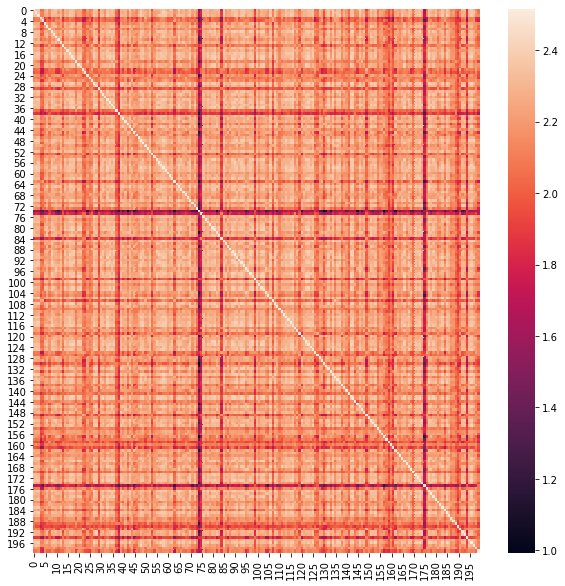

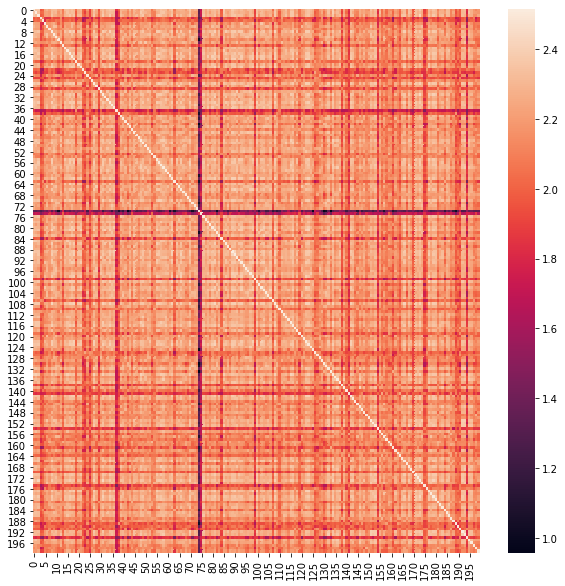

In [320]:
P1c = P1.T - m1*np.ones(c1)
P2c = P2.T - m2*np.ones(c2)
S1 = (np.matmul(P1c.T,P1c))/c1
S2 = (np.matmul(P2c.T,P2c))/c2

plt.figure(figsize=(10,10))
sns.heatmap(S1)

plt.figure(figsize=(10,10))
sns.heatmap(S2)

# **Task 2: Identifying Objects**

In [321]:
data2 = loadmat('/content/drive/MyDrive/msml 603/project_1/pose.mat')

pose = data2['pose']

pose.shape

(48, 40, 13, 68)

In [322]:
p1,p2,poses,subjects=pose.shape

print(p1,p2,poses,subjects)

48 40 13 68


In [327]:
k = 68


pose_trainX = np.zeros((10*k,48*40))
pose_trainY = np.zeros((10*k,1))
pose_testX = np.zeros((3*k,p1*p2))
pose_testY = np.zeros((3*k,1))


In [ ]:
 for i in range(0,k):
   for j in range(0,10):
     temp = post(:,:,j,i)
     idx = (i-1)*10+j
     pose_trainX[idx,:] = temp[:]
     post_trainY[idx] = i

   for j in range(10:13):
     temp = pose(:,:,j,i)
     idx = (i-1)*3+(j)
     pose_textX[idx,:] = temp[:]
     pose_testY[idx] = i

In [ ]:
d=5

#PCA for the training data
train_nP = len(pose_trainX)
colmean = np.mean(pose_trainX)
pose_trainX_center = pose_trainX-colmean
Utrain,Strain,Vtrain = np.linalg.svd(pose_trainX_center)

pose_trainX2 = pose_trainX_center*V[]:,1:d]


#PCA for the training data
test_nP = len(pose_testX)
colmean1 = np.mean(pose_testX)
pose_testX_center = pose_testX-colmean1
Utest,Stest,Vtest = np.linalg.svd(pose_trainX_center)

#Bayesian classifier

P = np.matlib.repmat(1/k,[k,1])

for i in range(0:k):
 temp_X = pose_trainX2[pose_trainY==i,:]
 temp_N = len(temp_X)
 temp_mu = np.mean(temp_X)
 temp_X_demean = temp_X-np.matlib.repmat(temp_mu,[temp_N,1])
 temp_var = (np.matmul(temp_X_demean.T,temp_X_demean))/temp_N

 train_mus[:,i] = temp_mu
 train_vars[:,:,i] = temp_var

 temp_invar = np.flip(temp_var)
 train_Ws[:,:,i] = -0.5*temp_invar
 train_ws[:,i] = np.matmul(temp_invar,temp_mu.T)
 train_omegas[i] = -0.5*temp_mu*temp_invar*temp_mu-0.5*np.log(np.det(temp_var))+np.log(P[i])




In [ ]:
#KNN
pick = KNeighborsClassifier(n_neighbors=5)
pick.fit(pose_trainX, pose_trainY)

pick.predict(pose_testX)
